<a href="https://colab.research.google.com/github/urvi1703/MAJOR-PROJECT/blob/main/CNN_MODEL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import os

# Define paths
drone_path = "/content/drive/MyDrive/DRDO PROJECT/Dataset/Drone"
bg_noise_path = "/content/drive/MyDrive/DRDO PROJECT/Dataset/Background Noise"

# Count files
drone_count = len([f for f in os.listdir(drone_path) if f.endswith(".wav")])
bg_noise_count = len([f for f in os.listdir(bg_noise_path) if f.endswith(".wav")])

print(f"🚁 Drone files count: {drone_count}")
print(f"🔊 Background noise files count: {bg_noise_count}")

🚁 Drone files count: 2695
🔊 Background noise files count: 2700


In [ ]:
import shutil

# Move Drone files
for file in os.listdir(drone_path):
    shutil.move(os.path.join(drone_path, file), "/content/drive/MyDrive/DRDO PROJECT/Dataset/Drone")

# Move Background Noise files
for file in os.listdir(bg_noise_path):
    shutil.move(os.path.join(bg_noise_path, file), "/content/drive/MyDrive/DRDO PROJECT/Dataset/Background Noise")

print("✅ All files moved successfully!")

✅ All files moved successfully!


In [ ]:
import os

drone_path = "/content/drive/MyDrive/DRDO PROJECT/Dataset/Drone"
bg_noise_path = "/content/drive/MyDrive/DRDO PROJECT/Dataset/Background Noise"  # No space at the end

# Count files
drone_count = len([f for f in os.listdir(drone_path) if f.endswith(".wav")])
bg_noise_count = len([f for f in os.listdir(bg_noise_path) if f.endswith(".wav")])

print(f"🚁 Final Drone files count: {drone_count}")
print(f"🔊 Final Background Noise files count: {bg_noise_count}")

🚁 Final Drone files count: 2695
🔊 Final Background Noise files count: 2700


In [4]:
# Install missing libraries (if required)
!pip install librosa numpy pandas tensorflow keras matplotlib seaborn scikit-learn

# Import necessary libraries
import os
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

In [5]:
# Define paths
drone_path = "/content/drive/MyDrive/DRDO PROJECT/Dataset/Drone"
bg_noise_path = "/content/drive/MyDrive/DRDO PROJECT/Dataset/Background Noise"

# Function to extract Mel spectrogram features
def extract_features(file_path, sr=16000, n_mfcc=40):
    y, sr = librosa.load(file_path, sr=sr)  # Load audio file
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)  # Extract MFCC features
    return mfcc

# Prepare data
X, Y = [], []  # Feature matrix and labels

# Process Drone audio
for file in os.listdir(drone_path):
    if file.endswith(".wav"):
        file_path = os.path.join(drone_path, file)
        X.append(extract_features(file_path))
        Y.append(1)  # Label 1 for Drone

# Process Background Noise audio
for file in os.listdir(bg_noise_path):
    if file.endswith(".wav"):
        file_path = os.path.join(bg_noise_path, file)
        X.append(extract_features(file_path))
        Y.append(0)  # Label 0 for Background Noise

# Convert to numpy arrays
X = np.array(X)
Y = np.array(Y)

print(f"✅ Total Samples: {len(X)} | Drone: {sum(Y)} | Background Noise: {len(Y) - sum(Y)}")

✅ Total Samples: 5395 | Drone: 2695 | Background Noise: 2700


In [6]:
# Reshape input data for CNN (expand dimensions for compatibility)
X = np.expand_dims(X, axis=-1)

# Split dataset
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Convert labels to categorical (one-hot encoding)
Y_train = to_categorical(Y_train, num_classes=2)
Y_test = to_categorical(Y_test, num_classes=2)

print(f"✅ Training Samples: {len(X_train)}, Testing Samples: {len(X_test)}")

✅ Training Samples: 4316, Testing Samples: 1079


In [7]:
# Define CNN model
def build_cnn_model():
    model = Sequential([
        Conv2D(32, (3,3), activation='relu', input_shape=(X.shape[1], X.shape[2], 1)),
        MaxPooling2D((2,2)),
        Conv2D(64, (3,3), activation='relu'),
        MaxPooling2D((2,2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.3),
        Dense(2, activation='softmax')  # Output layer for 2 classes
    ])

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Build model
model = build_cnn_model()
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 38, 30, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 19, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 17, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 3072)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         393,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │             258 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 412,418 (1.57 MB)

 Trainable params: 412,418 (1.57 MB)

 Non-trainable params: 0 (0.00 B)

In [8]:
# Train the model
history = model.fit(X_train, Y_train, epochs=20, batch_size=32, validation_data=(X_test, Y_test))

Epoch 1/20
135/135 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - accuracy: 0.8435 - loss: 1.2919 - val_accuracy: 0.9944 - val_loss: 0.0199
Epoch 2/20
135/135 ━━━━━━━━━━━━━━━━━━━━ 7s 41ms/step - accuracy: 0.9902 - loss: 0.0274 - val_accuracy: 0.9944 - val_loss: 0.0152
Epoch 3/20
135/135 ━━━━━━━━━━━━━━━━━━━━ 8s 28ms/step - accuracy: 0.9962 - loss: 0.0140 - val_accuracy: 0.9805 - val_loss: 0.0528
Epoch 4/20
135/135 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - accuracy: 0.9937 - loss: 0.0158 - val_accuracy: 0.9991 - val_loss: 0.0027
Epoch 5/20
135/135 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - accuracy: 0.9994 - loss: 0.0020 - val_accuracy: 1.0000 - val_loss: 2.3415e-04
Epoch 6/20
135/135 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - accuracy: 1.0000 - loss: 3.5961e-04 - val_accuracy: 1.0000 - val_loss: 1.0505e-04
Epoch 7/20
135/135 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - accuracy: 0.9999 - loss: 4.7865e-04 - val_accuracy: 0.9954 - val_loss: 0.0115
Epoch 8/20
135/135 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - accuracy: 0.9925 - loss: 0

In [9]:
# Evaluate Model
test_loss, test_acc = model.evaluate(X_test, Y_test)
print(f"🎯 Test Accuracy: {test_acc:.4f}")

# Save Model
model.save("/content/drive/MyDrive/DRDO PROJECT/drone_cnn_model.h5")
print("✅ Model saved successfully!")

34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9988 - loss: 0.0014


🎯 Test Accuracy: 0.9991
✅ Model saved successfully!


In [10]:
def predict_audio(file_path, model):
    feature = extract_features(file_path, sr=16000)  # Ensure same 16kHz sampling rate
    feature = np.expand_dims(feature, axis=(0, -1))  # Reshape for CNN
    prediction = model.predict(feature)

    class_label = np.argmax(prediction)
    class_name = "Drone" if class_label == 1 else "Background Noise"
    print(f"🎯 Prediction: {class_name}")

# Test a new audio file
predict_audio("/content/drive/MyDrive/DRDO PROJECT/Sample model/Test/Drone/drone_1.wav", model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
🎯 Prediction: Drone


In [11]:
# Re-train with more epochs & different batch size
history = model.fit(X_train, Y_train, epochs=30, batch_size=16, validation_data=(X_test, Y_test))

Epoch 1/30
270/270 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 1.0000 - loss: 2.2568e-04 - val_accuracy: 0.9972 - val_loss: 0.0074
Epoch 2/30
270/270 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - accuracy: 0.9922 - loss: 0.0283 - val_accuracy: 0.9981 - val_loss: 0.0023
Epoch 3/30
270/270 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.9947 - loss: 0.0158 - val_accuracy: 0.9907 - val_loss: 0.0251
Epoch 4/30
270/270 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - accuracy: 0.9961 - loss: 0.0131 - val_accuracy: 1.0000 - val_loss: 0.0014
Epoch 5/30
270/270 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.9971 - loss: 0.0051 - val_accuracy: 1.0000 - val_loss: 8.6082e-05
Epoch 6/30
270/270 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 1.0000 - loss: 3.6515e-04 - val_accuracy: 1.0000 - val_loss: 1.9529e-05
Epoch 7/30
270/270 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - accuracy: 0.9999 - loss: 2.1183e-04 - val_accuracy: 0.9991 - val_loss: 0.0011
Epoch 8/30
270/270 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.9912 - los

<ipython-input-12-306f5c988533>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels, y=counts, palette='coolwarm')


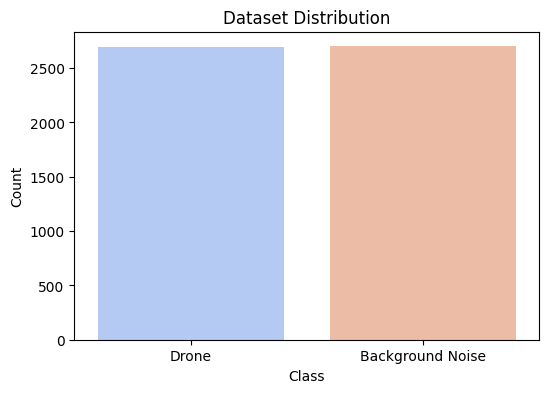

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import librosa.display

# Dataset Distribution
labels = ['Drone', 'Background Noise']
counts = [sum(Y), len(Y) - sum(Y)]

plt.figure(figsize=(6,4))
sns.barplot(x=labels, y=counts, palette='coolwarm')
plt.title("Dataset Distribution")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

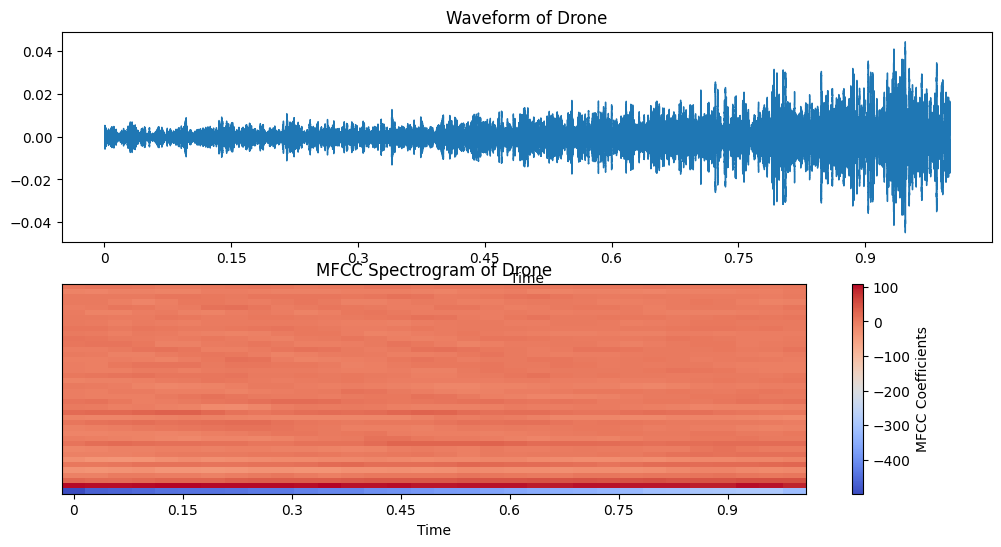

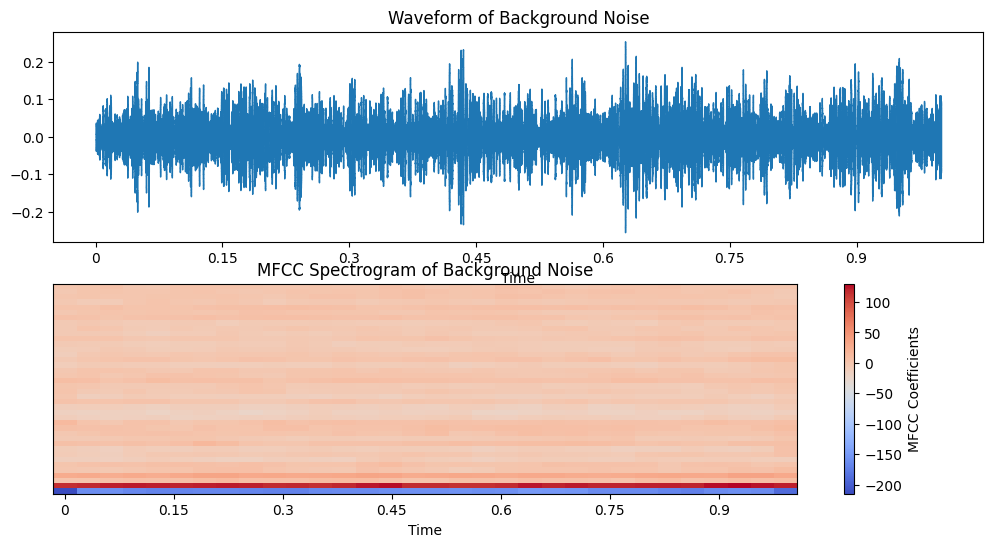

In [13]:
def plot_waveform_and_spectrogram(file_path, title):
    y, sr = librosa.load(file_path, sr=16000)

    plt.figure(figsize=(12, 6))

    # Waveform
    plt.subplot(2, 1, 1)
    librosa.display.waveshow(y, sr=sr)
    plt.title(f"Waveform of {title}")

    # Spectrogram
    plt.subplot(2, 1, 2)
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40)
    librosa.display.specshow(mfcc, sr=sr, x_axis="time", cmap="coolwarm")
    plt.colorbar(label="MFCC Coefficients")
    plt.title(f"MFCC Spectrogram of {title}")

    plt.show()

# Visualize a drone audio sample
plot_waveform_and_spectrogram("/content/drive/MyDrive/DRDO PROJECT/Dataset/Drone/drone_1.wav", "Drone")

# Visualize a background noise sample
plot_waveform_and_spectrogram("/content/drive/MyDrive/DRDO PROJECT/Dataset/Background Noise/Background_Noise1.wav", "Background Noise")

In [ ]:
from tensorflow.keras.layers import BatchNormalization

# Updated CNN Model
def build_improved_cnn():
    model = Sequential([
        Conv2D(32, (3,3), activation='relu', input_shape=(X.shape[1], X.shape[2], 1)),
        BatchNormalization(),
        MaxPooling2D((2,2)),

        Conv2D(64, (3,3), activation='relu'),
        BatchNormalization(),
        MaxPooling2D((2,2)),

        Conv2D(128, (3,3), activation='relu'),
        MaxPooling2D((2,2)),

        Flatten(),
        Dense(256, activation='relu'),
        Dropout(0.4),
        Dense(2, activation='softmax')  # Output layer for 2 classes
    ])

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Build & Train
model = build_improved_cnn()
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 38, 30, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 38, 30, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 19, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 17, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 17, 13, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 8, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 6, 4, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 3, 2, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 768)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │         196,864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 2)                   │             514 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 290,434 (1.11 MB)

 Trainable params: 290,242 (1.11 MB)

 Non-trainable params: 192 (768.00 B)

Epoch 1/25
135/135 ━━━━━━━━━━━━━━━━━━━━ 6s 46ms/step - accuracy: 1.0000 - loss: 7.4625e-06 - val_accuracy: 1.0000 - val_loss: 2.4413e-06
Epoch 2/25
135/135 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - accuracy: 1.0000 - loss: 2.1907e-06 - val_accuracy: 1.0000 - val_loss: 2.8590e-06
Epoch 3/25
135/135 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - accuracy: 1.0000 - loss: 1.4745e-05 - val_accuracy: 1.0000 - val_loss: 3.7017e-06
Epoch 4/25
135/135 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - accuracy: 1.0000 - loss: 5.6803e-06 - val_accuracy: 1.0000 - val_loss: 5.2214e-06
Epoch 5/25
135/135 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - accuracy: 1.0000 - loss: 3.5303e-06 - val_accuracy: 1.0000 - val_loss: 2.1614e-06
Epoch 6/25
135/135 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - accuracy: 1.0000 - loss: 5.9030e-07 - val_accuracy: 1.0000 - val_loss: 7.9516e-07
Epoch 7/25
135/135 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - accuracy: 1.0000 - loss: 5.9719e-07 - val_accuracy: 1.0000 - val_loss: 8.1966e-07
Epoch 8/25
135/135 ━━━━━━━━━━━━━━━━━━━━ 5

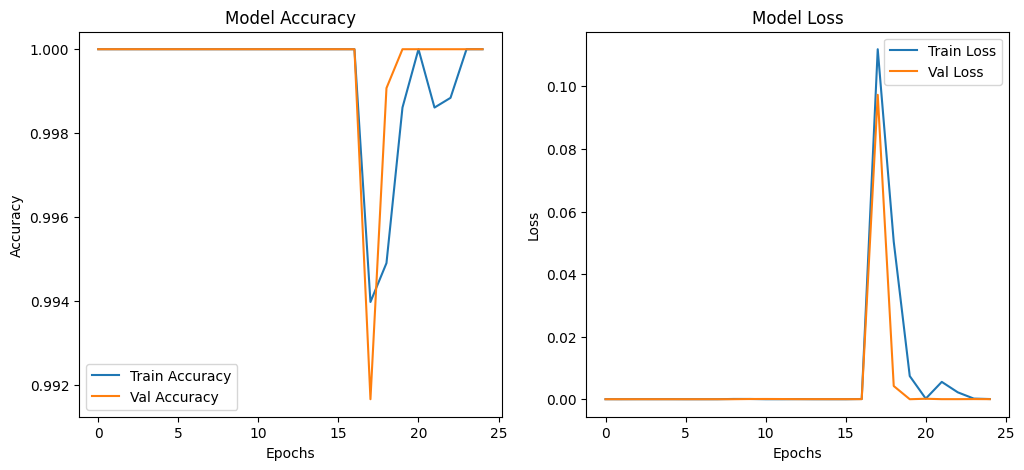

In [14]:
# Train the model
history = model.fit(X_train, Y_train, epochs=25, batch_size=32, validation_data=(X_test, Y_test))

# Plot Accuracy & Loss
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.show()

34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
                  precision    recall  f1-score   support

Background Noise       1.00      1.00      1.00       521
           Drone       1.00      1.00      1.00       558

        accuracy                           1.00      1079
       macro avg       1.00      1.00      1.00      1079
    weighted avg       1.00      1.00      1.00      1079



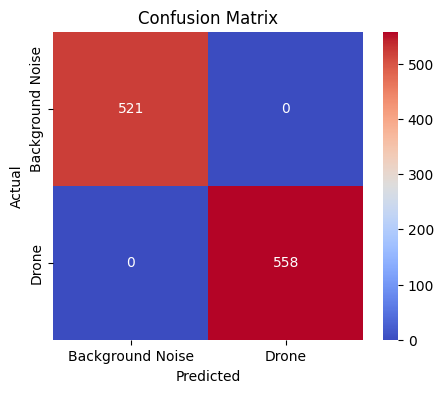

In [15]:
from sklearn.metrics import classification_report, confusion_matrix

# Predictions
Y_pred = model.predict(X_test)
Y_pred_classes = np.argmax(Y_pred, axis=1)
Y_test_classes = np.argmax(Y_test, axis=1)

# Classification Report
print(classification_report(Y_test_classes, Y_pred_classes, target_names=["Background Noise", "Drone"]))

# Confusion Matrix
cm = confusion_matrix(Y_test_classes, Y_pred_classes)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm', xticklabels=["Background Noise", "Drone"], yticklabels=["Background Noise", "Drone"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [16]:
from tensorflow.keras.models import load_model

# Load the trained model
model = load_model("/content/drive/MyDrive/DRDO PROJECT/drone_cnn_model.h5")

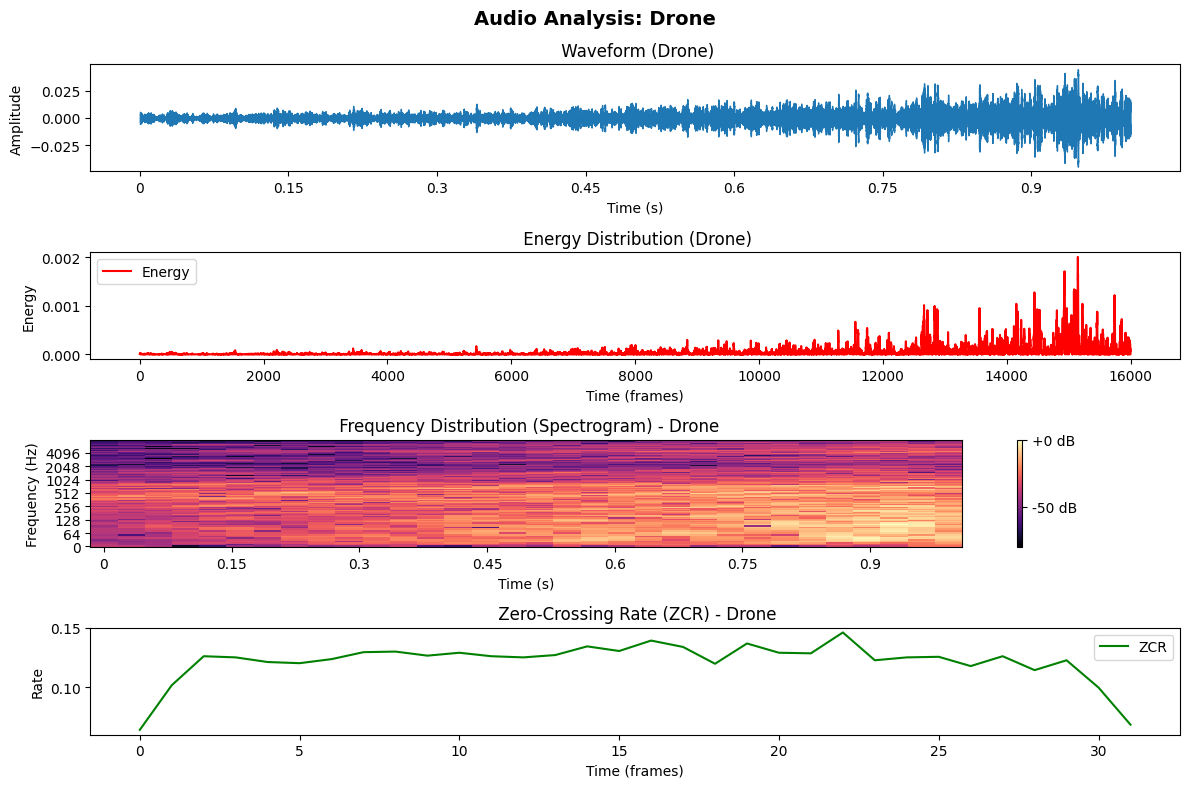

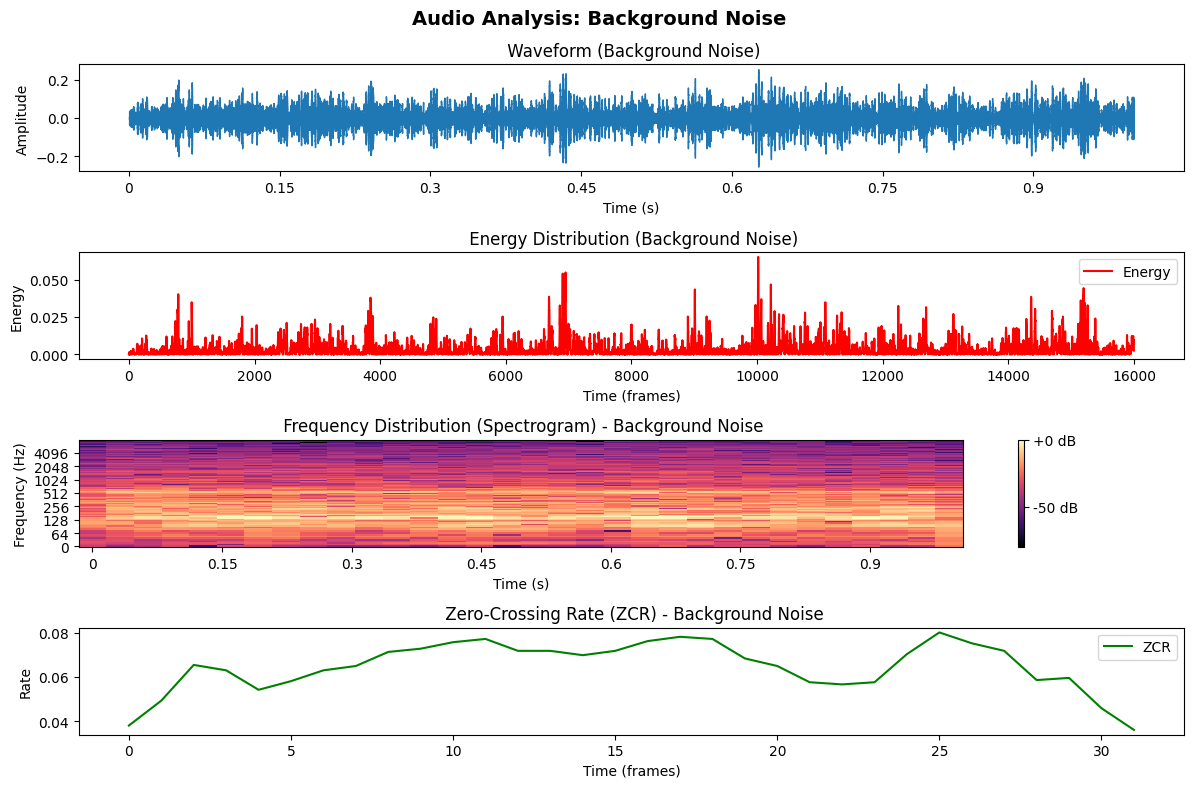

In [17]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def visualize_audio(file_path, label, sr=16000):
    """ Visualize waveform, energy distribution, frequency distribution, and ZCR of an audio file."""
    y, _ = librosa.load(file_path, sr=sr)

    plt.figure(figsize=(12, 8))
    plt.suptitle(f"Audio Analysis: {label}", fontsize=14, fontweight="bold")  # 🏷 Title for clarity

    # 🔹 Waveform
    plt.subplot(4, 1, 1)
    librosa.display.waveshow(y, sr=sr)
    plt.title(f" Waveform ({label})")
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")

    # 🔹 Energy Distribution
    energy = np.square(y)
    plt.subplot(4, 1, 2)
    plt.plot(energy, color='r', label="Energy")
    plt.title(f" Energy Distribution ({label})")
    plt.xlabel("Time (frames)")
    plt.ylabel("Energy")
    plt.legend()

    # 🔹 Frequency Distribution (Spectrogram)
    D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
    plt.subplot(4, 1, 3)
    librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='log')
    plt.colorbar(format='%+2.0f dB')
    plt.title(f" Frequency Distribution (Spectrogram) - {label}")
    plt.xlabel("Time (s)")
    plt.ylabel("Frequency (Hz)")

    # 🔹 Zero-Crossing Rate (ZCR)
    zcr = librosa.feature.zero_crossing_rate(y)
    plt.subplot(4, 1, 4)
    plt.plot(zcr[0], color='g', label="ZCR")
    plt.title(f" Zero-Crossing Rate (ZCR) - {label}")
    plt.xlabel("Time (frames)")
    plt.ylabel("Rate")
    plt.legend()

    plt.tight_layout()
    plt.show()

# 🔍 Call function for both categories
visualize_audio("/content/drive/MyDrive/DRDO PROJECT/Dataset/Drone/drone_1.wav", "Drone")
visualize_audio("/content/drive/MyDrive/DRDO PROJECT/Dataset/Background Noise/Background_Noise1.wav", "Background Noise")

In [33]:
import librosa
import numpy as np

def predict_audio(file_path, model, sr=16000):
    """🔍 Load an audio file and predict its class."""
    y, _ = librosa.load(file_path, sr=sr)

    # Extract MFCC features
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40)

    # **Fixing Shape Issue: Resize MFCC to (40, 32)**
    target_width = 32  # Because your model expects (40, 32, 1)
    if mfccs.shape[1] < target_width:
        # **Padding** if too short
        mfccs = np.pad(mfccs, pad_width=((0, 0), (0, target_width - mfccs.shape[1])), mode='constant')
    else:
        # **Truncate** if too long
        mfccs = mfccs[:, :target_width]

    # Reshape for CNN input
    mfccs = mfccs.reshape(1, 40, 32, 1)  # ✅ Now it matches your model

    # Predict
    prediction = model.predict(mfccs)
    predicted_class = np.argmax(prediction)

    class_labels = ["Background Noise", "Drone"]  # Adjust if needed
    print(f"🎯 Predicted Class: {class_labels[predicted_class]}")

# Example usage
predict_audio("/content/drive/MyDrive/DRDO PROJECT/Dataset/Background Noise/Background_Noise1.wav", model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
🎯 Predicted Class: Background Noise


In [18]:
print(model.input_shape)

(None, 40, 32, 1)


In [19]:
model.save("/content/drive/MyDrive/DRDO PROJECT/drone_cnn_model.keras")

In [32]:
from keras.saving import load_model

model = load_model("/content/drive/MyDrive/DRDO PROJECT/drone_cnn_model.keras")

In [31]:
from keras.optimizers import Adam

model.compile(optimizer=Adam(), loss="categorical_crossentropy", metrics=["accuracy"])

In [30]:
print("Model expects input shape:", model.input_shape)

Model expects input shape: (None, 40, 32, 1)


In [23]:
import librosa
import numpy as np

def predict_audio(file_path, model, sr=16000):
    """🔍 Load an audio file and predict its class."""
    y, _ = librosa.load(file_path, sr=sr)

    # Extract MFCC features
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40)

    # Ensure correct shape
    max_len = 32  # ✅ Change from 100 to 32 to match model input
    if mfccs.shape[1] < max_len:
        mfccs = np.pad(mfccs, pad_width=((0, 0), (0, max_len - mfccs.shape[1])), mode='constant')
    else:
        mfccs = mfccs[:, :max_len]  # ✅ Trim to 32

    # Reshape for CNN model
    mfccs = mfccs.reshape(1, mfccs.shape[0], mfccs.shape[1], 1)  # (1, 40, 32, 1)

    # Predict
    prediction = model.predict(mfccs)
    predicted_class = np.argmax(prediction)

    class_labels = ["Background Noise", "Drone"]  # Adjust based on dataset
    print(f"🎯 Predicted Class: {class_labels[predicted_class]}")

# Example usage
predict_audio("/content/drive/MyDrive/DRDO PROJECT/Dataset/Background Noise/Background_Noise1.wav", model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
🎯 Predicted Class: Background Noise


In [34]:
test_loss, test_acc = model.evaluate(X_test, Y_test)
print(f"Test Accuracy: {test_acc:.4f}")

34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9988 - loss: 0.0014
Test Accuracy: 0.9991


Rough

In [ ]:
import sounddevice as sd

def real_time_detection(model, duration=2, sr=16000):
    print("🎤 Listening for drone noise...")

    # Record audio
    recording = sd.rec(int(duration * sr), samplerate=sr, channels=1, dtype=np.float32)
    sd.wait()

    # Convert to feature
    feature = librosa.feature.mfcc(y=recording[:,0], sr=sr, n_mfcc=40)
    feature = np.expand_dims(feature, axis=(0, -1))

    # Predict
    prediction = model.predict(feature)
    class_label = np.argmax(prediction)
    class_name = "🚁 Drone Detected!" if class_label == 1 else "🔇 Background Noise"
    print(f"🎯 Prediction: {class_name}")

# Run real-time detection
real_time_detection(model)

ModuleNotFoundError: No module named 'sounddevice'

In [ ]:
pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 42.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 42.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.4 MB/s eta 0:00:00


In [ ]:
import librosa
import numpy as np
import streamlit as st

# Load the trained model
def predict_audio(file_path, model):
    y, sr = librosa.load(file_path, sr=16000)
    feature = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40)
    feature = np.expand_dims(feature, axis=(0, -1))

    prediction = model.predict(feature)
    class_label = np.argmax(prediction)

    return "🚁 Drone Detected!" if class_label == 1 else "🔇 Background Noise"

# Streamlit Interface for Drone Detection
st.title("🎤 Drone Noise Detection System")
uploaded_file = st.file_uploader("Upload an audio file", type=["wav"])

if uploaded_file is not None:
    st.write(f"🎯 Prediction: {predict_audio(uploaded_file, model)}")

2025-03-22 19:33:32.649 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-22 19:33:33.048 
  command:

    streamlit run /usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-03-22 19:33:33.051 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-22 19:33:33.053 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-22 19:33:33.056 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-22 19:33:33.058 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-22 19:33:33.061 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-22 19:33:33.064 Thread 'MainThread': mi